<a href="https://colab.research.google.com/github/HrishiHarsora/ES114-Probability-Statistics-Data-Visualization-/blob/main/ES114_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab Assignment 6 - Image Binarization using Otsu's Threshold**

# Importing Libraries and Defining Required Functions

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(image,title):
  histogram,_=np.histogram(image.flatten(),256,[0,256])
  total_number_of_pixels=image.shape[0]*image.shape[1]
  return histogram
  #Histogram is a 1D ndarray of length 256. the ith value represents the number of pixels with intensity i


def histogram_matching(source_img , Threshold):
    # return matched_img.astype(np.uint8)
    final = np.zeros(source_img.shape)
    l,b = source_img.shape
    for i in range(l):
      for j in range(b):
        if source_img[i,j] >= Threshold:
          final[i,j] = 255
        else:
          final[i,j] = 0
    return final

def noisy(image,variance):
  noisy_img =  image + np.random.normal(0,np.sqrt(variance),image.shape).round()
  # print(noisy_img)
  final = np.zeros(noisy_img.shape)
  l,b = noisy_img.shape
  for i in range(l):
    for j in range(b):
      if noisy_img[i,j] > 255:
        final[i,j] = 255
      elif noisy_img[i,j]<0:
        final[i,j] = 0
      else:
        final[i,j] = noisy_img[i,j]

  return final

# Defining Function to get Binarized Image

In [ ]:
def Binarized_image(histogram,Image):
  A = np.arange(256)

  #Finding Minimum within class variance
  V = []
  for i in A:
    ans = driver(histogram,i)
    V.append(ans)
  V = np.array(V)
  Minimum_V = min(V)

  #Finding Index of Minimum within class variance
  for i in range(len(V)):
    if V[i]==Minimum_V:
      ans = i
      break
    else:
      continue

  Index = ans

  #Threshold
  Threshold = Index


  #Matching the Histogram of given image with the desired Histogram
  Result_image = histogram_matching(Image,Threshold)
  plt.imshow(Result_image,cmap='gray')

# Defining Function to receive Within Class Variance

In [ ]:
def Background(histogram,value):
  if value != 0:
    total = np.sum(histogram)
    background = histogram[:value]
    WB = Weight_for_background = np.sum(background)/total
    MB = Mean_for_background = np.sum((np.arange(len(background))*background))/np.sum(background)
    VB = Variance_for_background = np.sum((((np.arange(len(background))-MB)**2) * background))/np.sum(background)
  else:
    WB=MB=VB=0
  return(WB*VB)

def Foreground(histogram,value):
  total = np.sum(histogram)
  foreground = histogram[value:]
  WF =  Weight_for_foreground = np.sum(foreground)/total
  MF = Mean_for_foreground = np.sum((np.arange(value,256)*foreground))/np.sum(foreground)
  VF = Variance_for_foreground = np.sum((((np.arange(value,256)-MF)**2)*foreground))/np.sum(foreground)
  return(WF*VF)


def driver(histogram,value):
  F = Foreground(histogram,value)
  B = Background(histogram,value)
  T = F+B
  return T

# Reading Images

In [ ]:
img1=cv2.imread("bookpage_1.jpeg",0)
histogram1=plot_histogram(img1,"Bookpage_1")

img2=cv2.imread("bookpage_2.jpeg",0)
histogram2=plot_histogram(img2,"Bookpage_2")

img3=cv2.imread("panther.jpeg",0)
histogram3=plot_histogram(img3,"Panther")

img4=cv2.imread("tom.jpeg",0)
histogram4=plot_histogram(img4,"Tom")

# Presenting Resultant Binarized Image

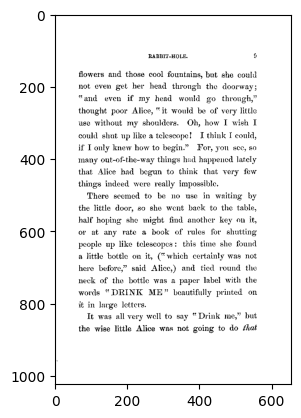

In [ ]:
#Image 1
Binarized_image(histogram1,img1)

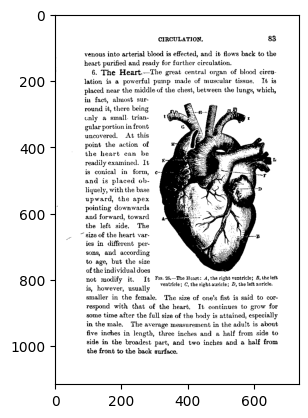

In [ ]:
#Image 2
Binarized_image(histogram2,img2)

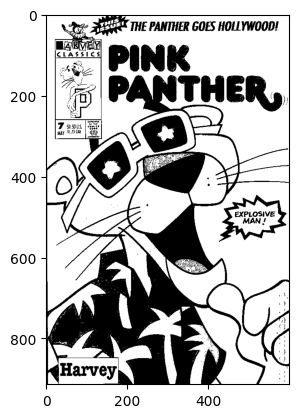

In [ ]:
#Image 3
Binarized_image(histogram3,img3)

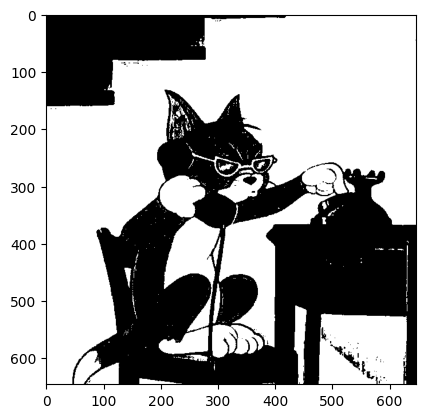

In [ ]:
#Image 4
Binarized_image(histogram4,img4)

# Printing Noisy Images with Variance = 10000 and also the corresponding Binarized Images

In [ ]:
Variance1 = 10000

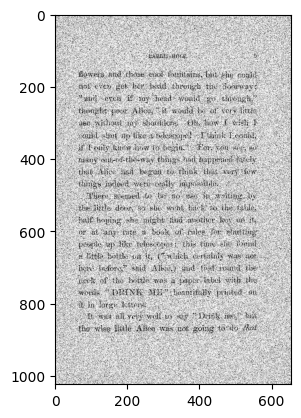

In [ ]:
IMG1 = noisy(img1,Variance1)
plt.imshow(IMG1,cmap='gray')

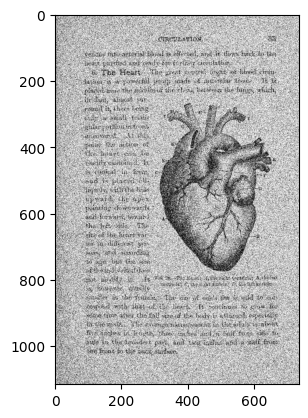

In [ ]:
IMG2 = noisy(img2,Variance1)
plt.imshow(IMG2,cmap='gray')

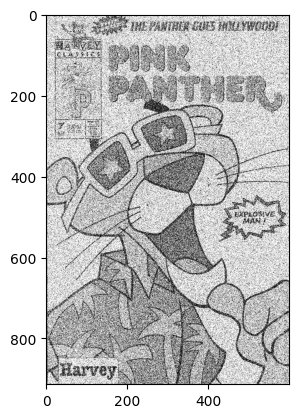

In [ ]:
IMG3 = noisy(img3,Variance1)
plt.imshow(IMG3,cmap='gray')

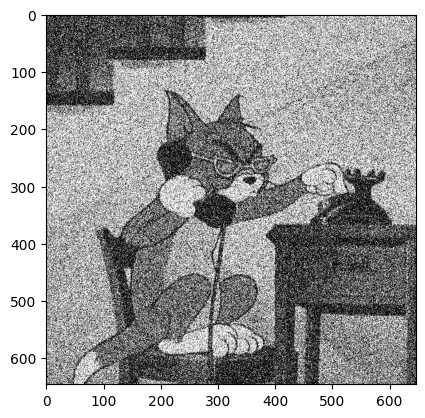

In [ ]:
IMG4 = noisy(img4,Variance1)
plt.imshow(IMG4,cmap='gray')

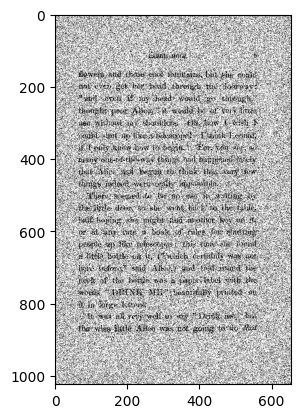

In [ ]:
#Noisy Image 1
Histogram1=plot_histogram(IMG1,"Bookpage_1")
Binarized_image(Histogram1,IMG1)

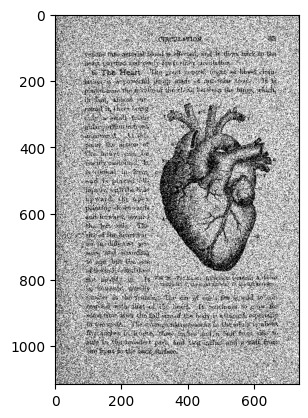

In [ ]:
#Noisy Image 2
Histogram2 = plot_histogram(IMG2,"Bookpage_2")
Binarized_image(Histogram2,IMG2)

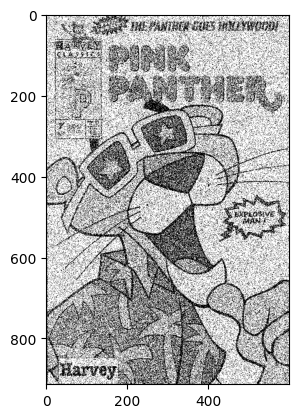

In [ ]:
#Noisy Image 3
Histogram3 = plot_histogram(IMG3,"panther")
Binarized_image(Histogram3,IMG3)

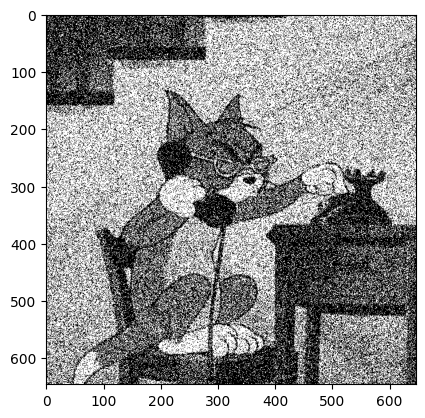

In [ ]:
#Noisy Image 4
Histogram4 = plot_histogram(IMG4,"Tom")
Binarized_image(Histogram4,IMG4)

# Printing Noisy Images with Variance = 2000 and also the corresponding Binarized Images

In [ ]:
Variance2 = 2000

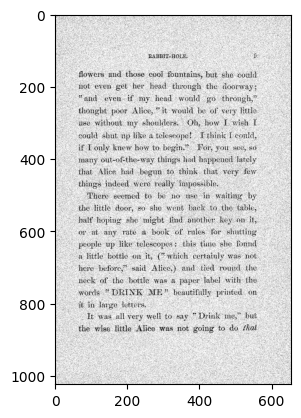

In [ ]:
Img1 = noisy(img1,Variance2)
plt.imshow(Img1,cmap='gray')

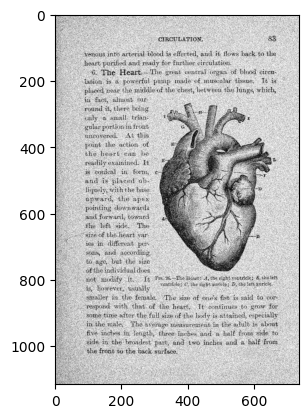

In [ ]:
Img2 = noisy(img2,Variance2)
plt.imshow(Img2,cmap='gray')

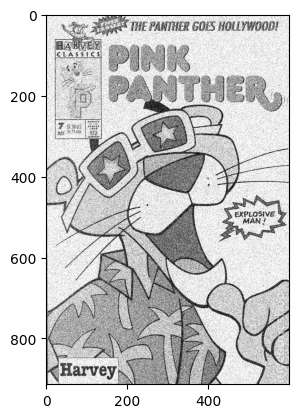

In [ ]:
Img3 = noisy(img3,Variance2)
plt.imshow(Img3,cmap='gray')

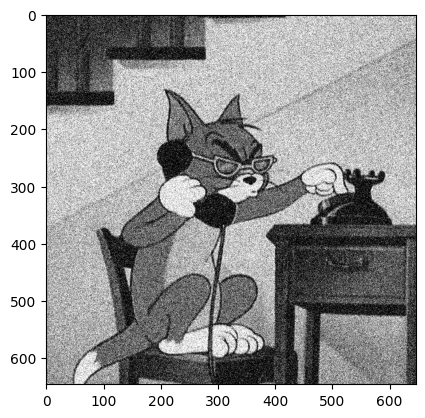

In [ ]:
Img4 = noisy(img4,Variance2)
plt.imshow(Img4,cmap='gray')

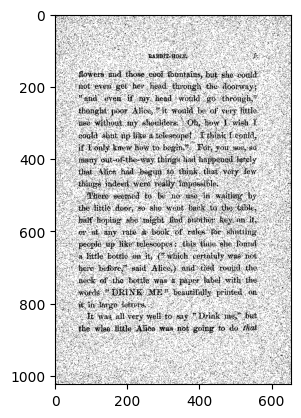

In [ ]:
#Noisy Image 1
Histogram1=plot_histogram(Img1,"Bookpage_1")
Binarized_image(Histogram1,Img1)

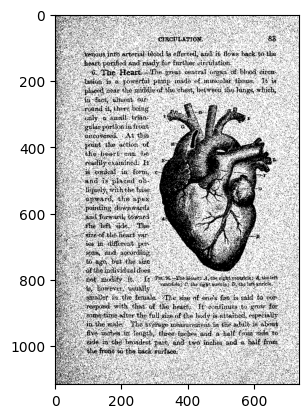

In [ ]:
#Noisy Image 2
Histogram2 = plot_histogram(Img2,"Bookpage_2")
Binarized_image(Histogram2,Img2)

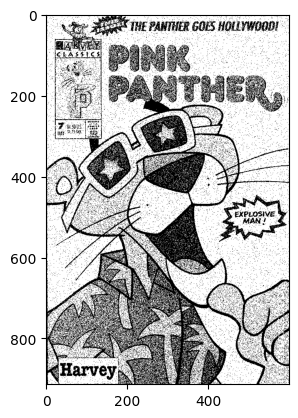

In [ ]:
#Noisy Image 3
Histogram3 = plot_histogram(Img3,"panther")
Binarized_image(Histogram3,Img3)

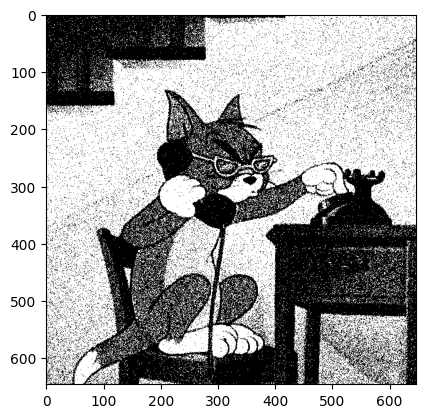

In [ ]:
#Noisy Image 4
Histogram4 = plot_histogram(Img4,"Tom")
Binarized_image(Histogram4,Img4)